<a href="https://colab.research.google.com/github/Lovedby/bostonHousingTest/blob/develop/test01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

start
/content
(404, 13)
(404,)
(102, 13)
(102,)
[15.2 42.3 50.  21.1 17.7 18.5 11.3 15.6 15.6 14.4 12.1 17.9 23.1 19.9
 15.7]
Epoch 1/600
11/11 [==============================] - 0s 11ms/step - loss: 560.0665 - mae: 21.8675 - val_loss: 580.7734 - val_mae: 22.4024
Epoch 2/600
11/11 [==============================] - 0s 5ms/step - loss: 513.7131 - mae: 20.7572 - val_loss: 526.5152 - val_mae: 21.2105
Epoch 3/600
11/11 [==============================] - 0s 5ms/step - loss: 458.7609 - mae: 19.4233 - val_loss: 459.2940 - val_mae: 19.6679
Epoch 4/600
11/11 [==============================] - 0s 5ms/step - loss: 390.1852 - mae: 17.7221 - val_loss: 375.5879 - val_mae: 17.5831
Epoch 5/600
11/11 [==============================] - 0s 5ms/step - loss: 310.0819 - mae: 15.4782 - val_loss: 280.3474 - val_mae: 14.8408
Epoch 6/600
11/11 [==============================] - 0s 5ms/step - loss: 221.9495 - mae: 12.6905 - val_loss: 184.3787 - val_mae: 11.5210
Epoch 7/600
11/11 [==============================]

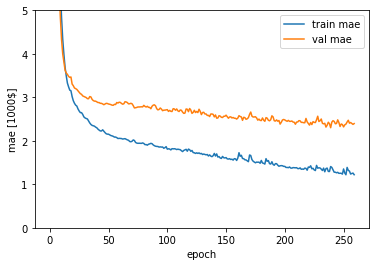

4/4 [==============================] - 0s 2ms/step - loss: 16.5066 - mae: 2.6569
loss:16.507
mae: 2.657
[ 7. 19. 19. 27. 22. 24. 31. 23. 20. 23.]
[ 9. 19. 22. 33. 26. 22. 25. 22. 20. 22.]
[ 7.2 18.8 19.  27.  22.2 24.5 31.2 22.9 20.5 23.2]
[ 9.029736 19.430626 21.51473  32.697445 25.789639 21.913733 25.323317
 22.442957 19.541637 21.87398 ]
fin...


In [31]:
from tensorflow.keras.datasets import boston_housing
from tensorflow.keras.layers import Activation,Dense,Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# 実際にボートレースに転用するためには、定式化と何を使ってどう推論を立てるか、検討してからデータセットを調達する必要がある。


print('start')
# colabでは、ビックリを打つとLinuxコマンドを発行できるようだ。
!pwd

(train_data,train_labels),(test_data,test_labels) = boston_housing.load_data();
print(train_data.shape); 
print(train_labels.shape); 
print(test_data.shape); 
print(test_labels.shape); 

column_names = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']
df = pd.DataFrame(train_data,columns=column_names)
df.head() # この後になんか書いてあると、出ないんだが・・・
# df.tail()

print(train_labels[0:15])

order = np.argsort(np.random.random(train_labels.shape))
# print(order)
train_data = train_data[order]
train_labels = train_labels[order]

mean = train_data.mean(axis=0)
std = train_data.std(axis=0)
train_data = (train_data - mean) / std
test_data = (test_data - mean) / std

df = pd.DataFrame(train_data,columns=column_names)
df.head() # この後になんか書いてあると、出ないんだが・・・
# 再度DFを作って中身を確認(正規化(0と1にすること?))ができているかどうか

# モデルの作成(エクスポート方法を確立しとけ)
model = Sequential()
model.add(Dense(64,activation='relu',input_shape=(13,)))
model.add(Dense(64,activation='relu'))
model.add(Dense(1))

# モデルのコンパイル
model.compile(loss='mse',optimizer=Adam(lr=0.001),metrics=['mae'])

# 効果なくなったら 切り上げる設定
early_stop = EarlyStopping(monitor='val_loss',patience=20)
# 学習開始
history = model.fit(train_data,train_labels,epochs=600,validation_split=0.2,callbacks=[early_stop])

print(history.history)

#history の plot
plt.plot(history.history['mae'],label='train mae')
plt.plot(history.history['val_mae'],label='val mae')
plt.xlabel('epoch')
plt.ylabel('mae [1000$]')
plt.legend(loc='best')
plt.ylim([0,5])
plt.show()

# eval
test_loss,test_mae = model.evaluate(test_data,test_labels)
print('loss:{:.3f}\nmae: {:.3f}'.format(test_loss,test_mae) )

# answer
print(np.round(test_labels[0:10]))

# guess result
test_predictions = model.predict(test_data[0:10]).flatten()
print(np.round(test_predictions))

# non rounded.
print(test_labels[0:10])
print(test_predictions)

print('fin...')
